In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 


full_data = pd.read_csv('all_breakdown.csv')
display(full_data.head())
full_data.info()

,TIMESTAMP,BIOGAS,BIOMASS,GEOTHERMAL,Hour,SMALL HYDRO,SOLAR,SOLAR PV,SOLAR THERMAL,WIND TOTAL
0,2011-07-21 00:00:00,177.0,372.0,984.0,1.0,516.0,0.0,NaN,NaN,1607.0
1,2011-07-21 01:00:00,176.0,373.0,984.0,2.0,509.0,0.0,NaN,NaN,1619.0
2,2011-07-21 02:00:00,177.0,371.0,985.0,3.0,506.0,0.0,NaN,NaN,1660.0
3,2011-07-21 03:00:00,177.0,374.0,985.0,4.0,504.0,0.0,NaN,NaN,1633.0
4,2011-07-21 04:00:00,177.0,377.0,984.0,5.0,508.0,0.0,NaN,NaN,1520.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67584 entries, 0 to 67583
Data columns (total 10 columns):
TIMESTAMP        67584 non-null object
BIOGAS           67584 non-null float64
BIOMASS          67584 non-null float64
GEOTHERMAL       67584 non-null float64
Hour             67584 non-null float64
SMALL HYDRO      67584 non-null float64
SOLAR            22680 non-null float64
SOLAR PV         44904 non-null float64
SOLAR THERMAL    44904 non-null float64
WIND TOTAL       67584 non-null float64
dtypes: float64(9), object(1)
memory usage: 5.2+ MB


In [2]:
full_data['SOLAR'] = full_data['SOLAR'].fillna(0)
full_data['SOLAR PV'] = full_data['SOLAR PV'].fillna(0)
full_data['SOLAR THERMAL'] = full_data['SOLAR THERMAL'].fillna(0)
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67584 entries, 0 to 67583
Data columns (total 10 columns):
TIMESTAMP        67584 non-null object
BIOGAS           67584 non-null float64
BIOMASS          67584 non-null float64
GEOTHERMAL       67584 non-null float64
Hour             67584 non-null float64
SMALL HYDRO      67584 non-null float64
SOLAR            67584 non-null float64
SOLAR PV         67584 non-null float64
SOLAR THERMAL    67584 non-null float64
WIND TOTAL       67584 non-null float64
dtypes: float64(9), object(1)
memory usage: 5.2+ MB


,Hour,SOLAR
0,1.0,0.793651
1,2.0,0.602116
2,3.0,0.492063
3,4.0,0.416931
4,5.0,0.359788
5,6.0,0.365079
6,7.0,3.423280
7,8.0,48.546569
8,9.0,200.586991
9,10.0,331.448324


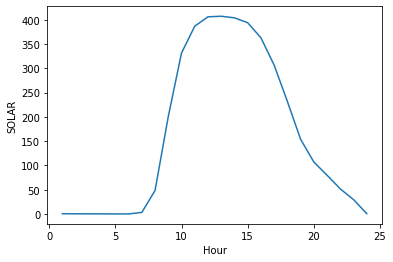

<function matplotlib.pyplot.show(*args, **kw)>

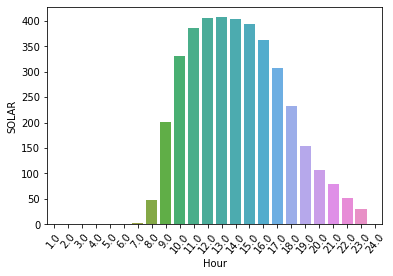

In [41]:
import seaborn as sns
hour_grouped = full_data.groupby('Hour')
solar_hour = pd.DataFrame(hour_grouped['SOLAR'].mean().reset_index())
display(solar_hour)

plot = sns.lineplot(solar_hour['Hour'],solar_hour['SOLAR'])
plt.show()

plot = sns.barplot(x='Hour',y='SOLAR',data=solar_hour)
plt.xticks(rotation=50)
plt.show

In [11]:
full_data['TIMESTAMP'] = pd.to_datetime(full_data['TIMESTAMP'])

In [19]:
full_data['MONTH'] = full_data['TIMESTAMP'].dt.month
full_data['YEAR'] = full_data['TIMESTAMP'].dt.year
full_data.head()

,TIMESTAMP,BIOGAS,BIOMASS,GEOTHERMAL,Hour,SMALL HYDRO,SOLAR,SOLAR PV,SOLAR THERMAL,WIND TOTAL,MONTH,YEAR
0,2011-07-21 00:00:00,177.0,372.0,984.0,1.0,516.0,0.0,NaN,NaN,1607.0,7,2011
1,2011-07-21 01:00:00,176.0,373.0,984.0,2.0,509.0,0.0,NaN,NaN,1619.0,7,2011
2,2011-07-21 02:00:00,177.0,371.0,985.0,3.0,506.0,0.0,NaN,NaN,1660.0,7,2011
3,2011-07-21 03:00:00,177.0,374.0,985.0,4.0,504.0,0.0,NaN,NaN,1633.0,7,2011
4,2011-07-21 04:00:00,177.0,377.0,984.0,5.0,508.0,0.0,NaN,NaN,1520.0,7,2011


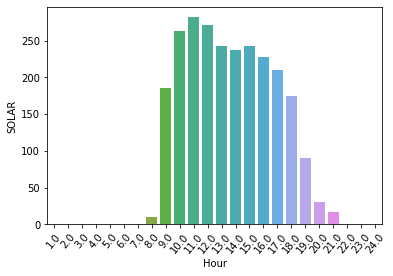

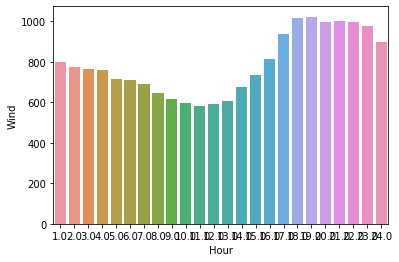

In [30]:
year_month = full_data.groupby(['YEAR','MONTH','Hour'])
solar_y_m = pd.DataFrame(year_month['SOLAR'].mean())
solar_y_m['Wind'] = year_month['WIND TOTAL'].mean()
solar_y_m['Error'] = year_month['SOLAR'].sem()
solar_y_m.head()
test = solar_y_m.loc[2010]
test2 = test.loc[4].reset_index()
plot = sns.barplot(x='Hour',y='SOLAR', data=test2)
plt.xticks(rotation=50)
plt.show()

plots = sns.barplot(x='Hour', y='Wind', data=test2)

(734563.0, 734684.0)

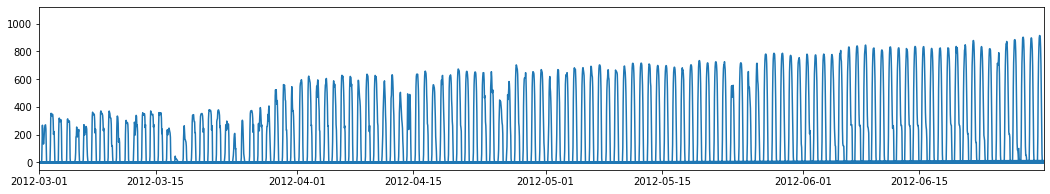

In [39]:
plt.figure(figsize=(18,3))
plt.plot(full_data['TIMESTAMP'],full_data['SOLAR'])
plt.xlim(pd.to_datetime('03/01/12'),pd.to_datetime('6/30/12'))
